# dimensionality analysis


In [3]:
import numpy as np

def generar_y_normalizar(n):
    # Generar un vector de n variables aleatorias normales estándar
    v = np.random.normal(size=n)
    
    # Normalizar el vector generado
    v_norm = v / np.linalg.norm(v)
    
    return v_norm


In [19]:
resultados=[]
for dim in [1,2,3,5,10,20,50,100,500,1000]:
    C,K=0,0
    while C<100000:
        bar_i= generar_y_normalizar(dim)
        i=generar_y_normalizar(dim)
        c=generar_y_normalizar(dim)
        if np.dot(bar_i,c)+0.2<np.dot(i,c):
            C+=1
            if np.dot(bar_i,i)>np.dot(i,c):
                K+=1
    print("Dim: ",dim,": ",K/C)
    resultados.append(K/C)
        

Dim:  1 :  0.0
Dim:  2 :  0.2634
Dim:  3 :  0.27569
Dim:  5 :  0.26958
Dim:  10 :  0.25301
Dim:  20 :  0.23061
Dim:  50 :  0.17624
Dim:  100 :  0.1253


KeyboardInterrupt: 

# plot

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de desigualdades implícito
def implicit_system(x, y, p,alpha):
    Z= (np.cos(y) >= np.cos(p) ) & (np.cos(p) >= np.cos(x)+alpha) & (x-p<=y) & (p>0) & (x>0) & (y>0)
    x_0,y_0=[],[]
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            if Z[i,j]:
                x_0.append(X[0,j])
                y_0.append(Y[i,0])
    return x_0,y_0

In [24]:


# Crear una malla de puntos en el plano xy
x_vals = np.linspace(0, 2*np.pi, 100)
y_vals = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función definida en cada punto de la malla
Z = implicit_system(X, Y, np.pi,0.4)
#Z_2= implicit_system(X, Y,0.4)
#Z_ = implicit_system(X, Y,0.2)


            
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(x_0, y_0, c="palegreen")
ax.set_title(r'Implicit solutions: $cos(n-p)>cos(p)>cos(n)+ \alpha$')
ax.set_xlabel("$n$")
ax.set_ylabel("$p$")
ax.set_xticks(tick_pos, labels)
ax.set_yticks(tick_pos, labels)
ax.legend([ rs_scatter], ['$0.4$', '$0$'], loc='lower right', title=r'$\alpha=$')
plt.show()

NameError: name 'n' is not defined

In [5]:
import matplotlib.colors
tick_pos= [0, np.pi/4 , np.pi/2 , 3*np.pi/4, np.pi]
labels = ['0', '$\dfrac{\pi}{4}$','$\dfrac{\pi}{2}$','$\dfrac{3\pi}{4}$','$\pi$']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


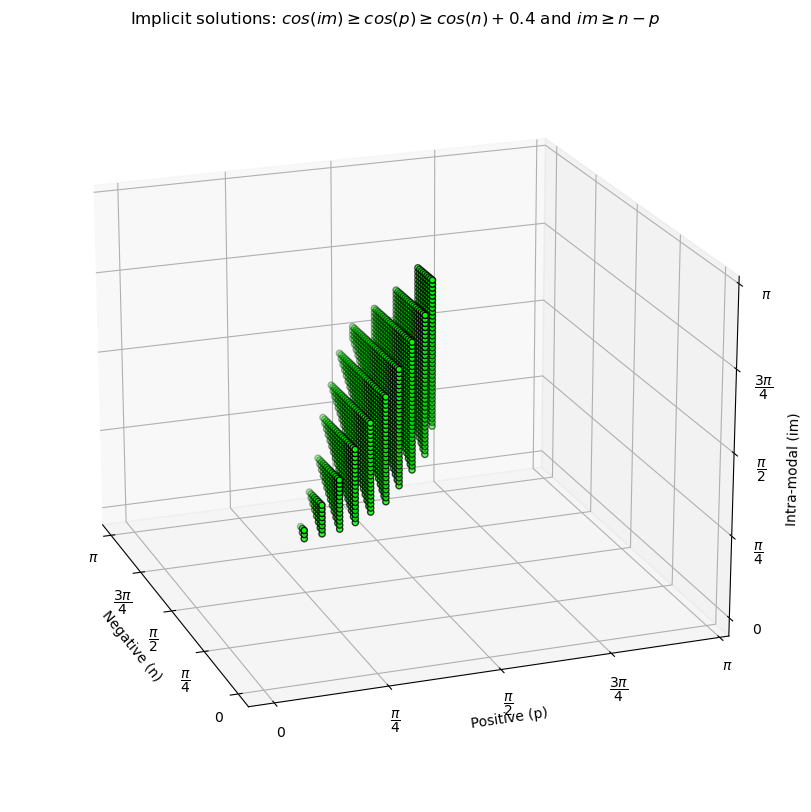

In [8]:
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x_vals = np.linspace(0, np.pi, 80)
y_vals = np.linspace(0, np.pi, 80)
X, Y = np.meshgrid(x_vals, y_vals)

l=np.linspace(0, np.pi, 20)
for i in range(len(l)):
    x_1,z_1= implicit_system(X, Y, l[i],0.4)
    y_1  = np.ones(len(x_1))*l[i]
    exec(f'x_{str(i)} = x_1')
    exec(f'y_{str(i)} = y_1')
    exec(f'z_{str(i)} = z_1')
    
    
#x_1,z_1= implicit_system(X, Y, l[0],0.4)
#x_2,z_2=implicit_system(X, Y, l[1],0.4)
#x_3,z_3=implicit_system(X, Y, l[2],0.4)
#x_4,z_4=implicit_system(X, Y, l[3],0.4)
#y_1  = np.ones(len(x_1))*l[0]
#y_2  = np.ones(len(x_2))* l[1]
#y_3  = np.ones(len(x_3))*l[2]
#y_4  = np.ones(len(x_4))*l[3]
    
pl.figure(figsize = (10,10))
ax = pl.subplot(111,projection='3d')

for i in range(len(l)):
    ax.scatter(globals()['x_'+str(i)], globals()['y_'+str(i)], globals()['z_'+str(i)] , color='lime', edgecolors='black')


#ax.scatter(x_1, y_1, z_1 , color='g')
#ax.scatter(x_2, y_2, z_2, color='g')
#ax.scatter(x_3, y_3, z_3, color='g')
#ax.scatter(x_4, y_4, z_4, color='g')

#ax.add_collection3d(pl.fill_between(x_1, 0.95*z_1, 1.05*z_1, color='r', alpha=0.3), zs=1, zdir='y')
#ax.add_collection3d(pl.fill_between(x_2, 0.90*z_2, 1.10*z_2, color='g', alpha=0.3), zs=2, zdir='y')
#ax.add_collection3d(pl.fill_between(x_3, 0.85*z_3, 1.15*z_3, color='b', alpha=0.3), zs=3, zdir='y')
ax.set_title(r'Implicit solutions: $cos(im)\geq cos(p) \geq cos(n)+0.4$ and $ im \geq n-p$')
ax.set_xlabel('Negative (n)')
ax.set_ylabel('Positive (p)')
ax.set_zlabel('Intra-modal (im)')
ax.invert_zaxis()
ax.set_xticks(tick_pos, labels)
ax.set_yticks(tick_pos, labels)
ax.set_zticks(tick_pos, labels)
ax.view_init(-160, 20)
#ax.legend(["a","b"])
plt.tight_layout()

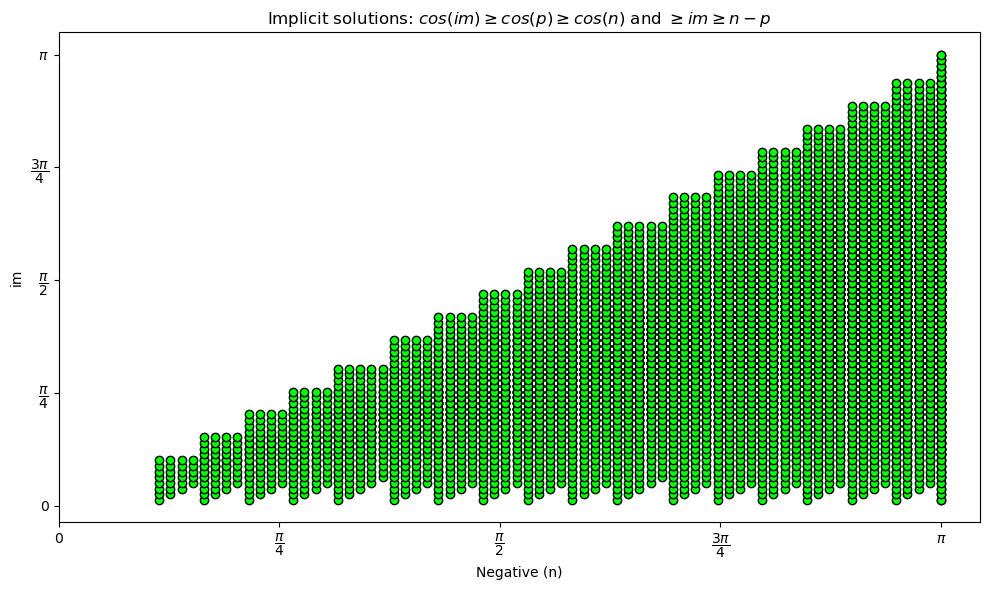

In [32]:
fig, ax = plt.subplots(figsize=[10, 6])


for i in range(len(l)):
    ax.scatter( globals()['x_'+str(i)],globals()['z_'+str(i)] , color='lime', edgecolors='black')


ax.set_title(r'Implicit solutions: $cos(im)\geq cos(p) \geq cos(n)$ and $\geq im \geq n-p$')
ax.set_xlabel('Negative (n)')
ax.set_ylabel('im')
ax.set_xticks(tick_pos, labels)
ax.set_yticks(tick_pos, labels)
#ax.legend(["a","b"])
plt.tight_layout()

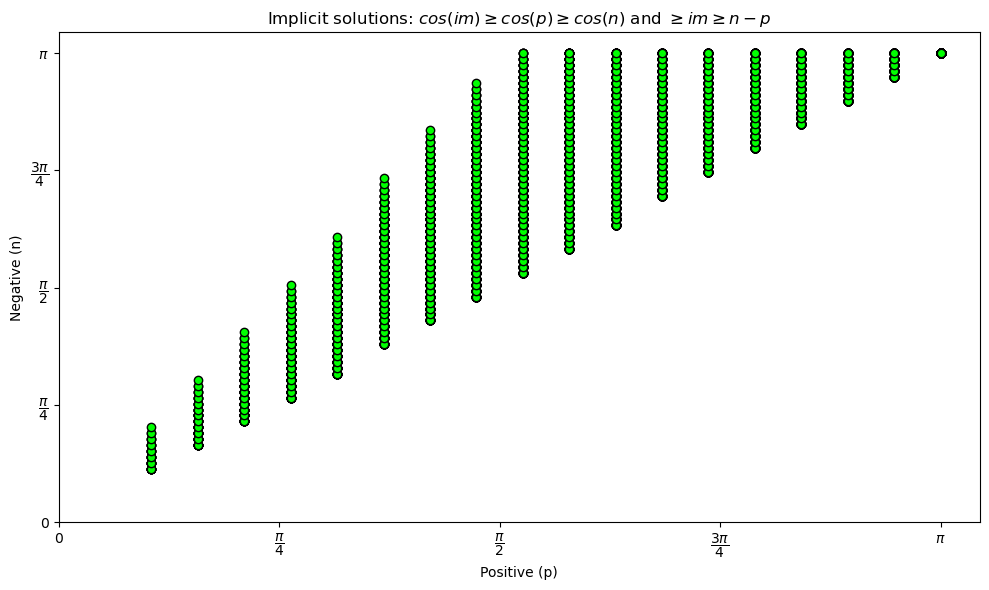

In [31]:
fig, ax = plt.subplots(figsize=[10, 6])


for i in range(len(l)):
    ax.scatter( globals()['y_'+str(i)],globals()['x_'+str(i)] , color='lime', edgecolors='black')


ax.set_title(r'Implicit solutions: $cos(im)\geq cos(p) \geq cos(n)$ and $\geq im \geq n-p$')
ax.set_ylabel('Negative (n)')
ax.set_xlabel('Positive (p)')
ax.set_xticks(tick_pos, labels)
ax.set_yticks(tick_pos, labels)
#ax.legend(["a","b"])
plt.tight_layout()

In [41]:
dict_.keys()

dict_keys([1.5707963267948966, 7.853981633974483])

# plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de desigualdades implícito
def implicit_system(x, y, alpha):
    return (np.cos(x-y) > np.cos(y) ) & (np.cos(y) > np.cos(x)+alpha)

# Crear una malla de puntos en el plano xy
x_vals = np.linspace(0, 2*np.pi, 3000)
y_vals = np.linspace(0, 2*np.pi, 3000)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función definida en cada punto de la malla
Z = implicit_system(X, Y,0)
Z_2= implicit_system(X, Y,0.4)
#Z_ = implicit_system(X, Y,0.2)


In [4]:
import matplotlib.colors
tick_pos= [0, np.pi/2 , np.pi , 3*np.pi/2,  2*np.pi]
labels = ['0', '$\dfrac{\pi}{2}$','$\pi$','$\dfrac{3 \pi}{2}$', '$2\pi$']

In [4]:
x_0,y_0=[],[]
x_04,y_04=[],[]
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        if Z[i,j]:
            x_0.append(X[0,j])
            y_0.append(Y[i,0])
        if Z_2[i,j]:
            x_04.append(X[0,j])
            y_04.append(Y[i,0])

In [62]:
len(x_04)

623112

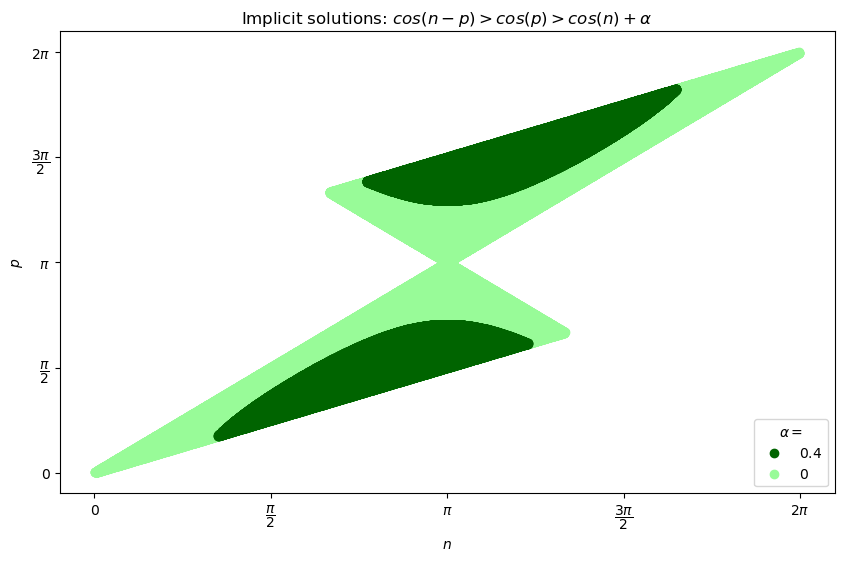

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(x_0, y_0, c="palegreen")
df_scatter = ax.scatter(x_04, y_04, c="darkgreen")
ax.set_title(r'Implicit solutions: $cos(n-p)>cos(p)>cos(n)+ \alpha$')
ax.set_xlabel("$n$")
ax.set_ylabel("$p$")
ax.set_xticks(tick_pos, labels)
ax.set_yticks(tick_pos, labels)
ax.legend([df_scatter, rs_scatter], ['$0.4$', '$0$'], loc='lower right', title=r'$\alpha=$')
plt.show()

In [45]:
from sympy.abc import x, y
from sympy import reduce_inequalities

In [49]:
reduce_inequalities(0 <= x + y*2 - 1, [x])

(x < oo) & (x >= 1 - 2*y)

In [15]:
#F30K

#HN

dos_siete= [25.857988165680474, 56.62721893491124, 69.0138067061144, 42.11045364891519, 73.86587771203156, 83.82642998027613]
cuatro_siete= [25.463510848126234, 55.52268244575937, 68.40236686390533, 43.19526627218935, 74.95069033530572, 82.74161735700197]
dos_ocho= [26.232741617357004, 56.68639053254438, 69.09270216962524, 44.47731755424063, 71.99211045364892, 82.54437869822485]
cuatro_ocho= [25.798816568047336, 55.52268244575937, 67.79092702169625, 42.70216962524655, 73.76725838264299, 83.72781065088758]
dos_mil= [26.370808678500985, 56.252465483234715, 68.16568047337279, 42.40631163708087, 74.35897435897436, 82.84023668639053]
cuatro_mil=  [25.384615384615383, 56.05522682445759, 68.32347140039448, 43.98422090729783, 73.07692307692308, 84.61538461538461]

#cuatro_mil_net=  [21.617357001972387, 49.13214990138067, 60.59171597633136, 33.72781065088758, 66.17357001972387, 75.7396449704142]
val_results= [dos_siete,cuatro_siete , dos_ocho, cuatro_ocho, dos_mil, cuatro_mil]
c=0
for i in val_results:
  print(c, np.round(np.sum(i),1))
  c+=1

0 351.3
1 350.3
2 351.0
3 349.3
4 350.4
5 351.4


In [ ]:
#COCO HN 
dos_mil= [9.616, 26.788, 38.156, 23.94, 48.6, 61.3]
cuatro_mil= [0.328, 1.704, 3.604, 1.12, 4.94, 8.4]

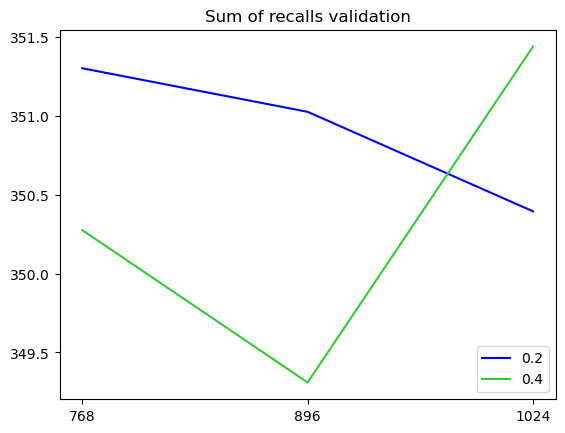

In [11]:
import matplotlib.pyplot as plt
epochs=['768', '896', '1024']
dos = [np.sum(dos_siete),np.sum(dos_ocho), np.sum(dos_mil)]
cuatro = [np.sum(cuatro_siete),np.sum(cuatro_ocho), np.sum(cuatro_mil)]

plt.plot(epochs, dos, color="b",  label="0.2")
plt.plot(epochs, cuatro,color="limegreen",label="0.4")
plt.title("Sum of recalls validation")
plt.legend(loc="lower right")

plt.show()

In [16]:
#F_HN

menos_tres=  [32.58382642998028, 61.38067061143984, 73.21499013806707, 41.913214990138066, 74.2603550295858, 83.62919132149901]
menos_dos=  [32.52465483234714, 61.676528599605525, 73.47140039447731, 42.80078895463511, 74.2603550295858, 83.33333333333333]
dos= [35.285996055226825, 64.93096646942801, 75.70019723865877, 40.92702169625247, 74.16173570019724, 84.91124260355029]
cuatro= [35.739644970414204, 64.91124260355029, 76.25246548323472, 41.42011834319526, 74.2603550295858, 84.91124260355029]
seis=  [35.108481262327416, 64.43786982248521, 75.46351084812623, 41.61735700197239, 71.59763313609467, 82.14990138067061]
val_results= [menos_tres,menos_dos,dos,cuatro, seis ]
c=0
for i in val_results:
  print(c, np.round(np.sum(i),1))
  c+=1

0 367.0
1 368.1
2 375.9
3 377.5
4 370.4


In [4]:
#HN net 712 0.4 2 capas
relu_2= [16.429980276134124, 39.447731755424066, 52.14990138067061, 4.812623274161735, 19.171597633136095, 29.447731755424062]
tanh_2=[25.660749506903354, 55.32544378698225, 67.98816568047337, 8.362919132149901, 32.58382642998028, 45.917159763313606]
tanh_3= [25.641025641025642, 55.38461538461539, 67.10059171597634, 8.461538461538462, 31.380670611439843, 45.20710059171598]
tanh_3_drop= [25.463510848126234, 54.61538461538461, 67.31755424063117, 8.382642998027613, 30.986193293885602, 45.36489151873767]
tanh_3_drop_1024= [25.502958579881657, 54.891518737672584, 67.57396449704142, 8.422090729783038, 31.26232741617357, 45.26627218934911]
val_results= [relu_2,tanh_2 , tanh_3, tanh_3_drop]

c=0
for i in val_results:
  print(c, np.sum(i))
  c+=1

0 161.4595660749507
1 235.83826429980277
2 233.17554240631162
3 232.1301775147929


In [10]:

a=np.load("/kaggle/input/cross-modal/COCO_FHN_test0.2_0.2_1024_None_test_metrics.npy",allow_pickle=True)
print("\n t2i: \n")
print("Recall", np.round(a[0][0][0],2), "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][1][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][1][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][1][2],3)) 

print("\n i2t: \n")
print("Recall", np.round(a[1][0][0],2), "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][0][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][0][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][0][2],3)) 

print("\n i2i: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][2][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][2][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][2][2],3)) 

print("\n t2t: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][3][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][3][1],3)) 
print("coverage,cos_div,nov \n", np.round(a[0][1][3][2],3)) 

b= np.load("/kaggle/input/cross-modal/COCO_FHN_test0.2_0.2_1024_None_Loss_recalls.npy",allow_pickle=True)
recalls=b[1]
F_HN_loss= [i[0] for i in b[0]]
F_HN_elements= [i[1] for i in b[0]]
F_HN_errores= [i[2] for i in b[0]]


 t2i: 

Recall [19.48 42.68 54.7 ] 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.615 0.551]
novedad_rougeL,novedad_spice 
 [0.804 0.715]
cos_div, coverage,nov 
 [ 0.     0.    18.336]

 i2t: 

Recall [18.82 42.42 55.9 ] 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.497 0.448]
novedad_rougeL,novedad_spice 
 [0.759 0.658]
cos_div, coverage,nov 
 [0.    0.    5.446]

 i2i: 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.708 0.623]
novedad_rougeL,novedad_spice 
 [0.932 0.783]
cos_div, coverage,nov 
 [ 0.     0.    18.036]

 t2t: 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.662 0.587]
novedad_rougeL,novedad_spice 
 [0.927 0.805]
coverage,cos_div,nov 
 [ 0.     0.    24.487]


In [2]:

a=np.load("/kaggle/input/cross-modal/COCO_R_test0.2_0.2_1024_None_test_metrics.npy",allow_pickle=True)
print("\n t2i: \n")
print("Recall", np.round(a[0][0][0],2), "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][1][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][1][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][1][2],3)) 

print("\n i2t: \n")
print("Recall", np.round(a[1][0][0],2), "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][0][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][0][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][0][2],3)) 

print("\n i2i: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][2][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][2][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][2][2],3)) 

print("\n t2t: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][3][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][3][1],3)) 
print("coverage,cos_div,nov \n", np.round(a[0][1][3][2],3)) 

#b= np.load("/kaggle/input/cross-modal/HN_test_0.4_0.4_1024_None_Loss_recalls.npy",allow_pickle=True)
#recalls=b[1]
#HN_loss= [i[0] for i in b[0]]
#HN_elements= [i[1] for i in b[0]]
#HN_errores= [i[2] for i in b[0]]


 t2i: 

Recall [16.48 40.5  54.71] 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.618 0.558]
novedad_rougeL,novedad_spice 
 [0.801 0.72 ]
cos_div, coverage,nov 
 [ 0.     0.    18.392]

 i2t: 

Recall [20.34 45.62 59.5 ] 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.516 0.475]
novedad_rougeL,novedad_spice 
 [0.769 0.676]
cos_div, coverage,nov 
 [0.    0.    5.773]

 i2i: 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.705 0.618]
novedad_rougeL,novedad_spice 
 [0.931 0.779]
cos_div, coverage,nov 
 [ 0.     0.    18.482]

 t2t: 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.682 0.65 ]
novedad_rougeL,novedad_spice 
 [0.933 0.837]
coverage,cos_div,nov 
 [ 0.     0.    24.033]


In [11]:

a=np.load("/kaggle/input/cross-modal/COCO_HN_test0.2_0.2_1024_None_test_metrics.npy",allow_pickle=True)
print("\n t2i: \n")
print("Recall", np.round(a[0][0][0],2), "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][1][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][1][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][1][2],3)) 

print("\n i2t: \n")
print("Recall", np.round(a[1][0][0],2), "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][0][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][0][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][0][2],3)) 

print("\n i2i: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][2][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][2][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][2][2],3)) 

print("\n t2t: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][3][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][3][1],3)) 
print("coverage,cos_div,nov \n", np.round(a[0][1][3][2],3)) 

b= np.load("/kaggle/input/cross-modal/COCO_HN_test0.2_0.2_1024_None_Loss_recalls.npy",allow_pickle=True)
recalls=b[1]
HN_loss= [i[0] for i in b[0]]
HN_elements= [i[1] for i in b[0]]
HN_errores= [i[2] for i in b[0]]


 t2i: 

Recall [ 9.88 26.2  37.76] 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.581 0.503]
novedad_rougeL,novedad_spice 
 [0.77  0.668]
cos_div, coverage,nov 
 [ 0.     0.    16.835]

 i2t: 

Recall [23.66 48.84 61.18] 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.531 0.483]
novedad_rougeL,novedad_spice 
 [0.781 0.685]
cos_div, coverage,nov 
 [0.    0.    5.815]

 i2i: 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.7   0.609]
novedad_rougeL,novedad_spice 
 [0.93  0.773]
cos_div, coverage,nov 
 [ 0.     0.    17.914]

 t2t: 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.671 0.633]
novedad_rougeL,novedad_spice 
 [0.928 0.826]
coverage,cos_div,nov 
 [ 0.     0.    23.502]


In [12]:
a=np.load("/kaggle/input/cross-modal/COCO_MHN_test0.2_0.2_1024_None_test_metrics.npy",allow_pickle=True)
print("\n t2i: \n")
print("Recall", np.round(a[0][0][0],2), "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][1][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][1][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][1][2],3)) 

print("\n i2t: \n")
print("Recall", np.round(a[1][0][0],2), "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][0][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][0][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][0][2],3)) 

print("\n i2i: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][2][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][2][1],3)) 
print("cos_div, coverage,nov \n", np.round(a[0][1][2][2],3)) 

print("\n t2t: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", np.round(a[0][1][3][0],3)) 
print("novedad_rougeL,novedad_spice \n", np.round(a[0][1][3][1],3)) 
print("coverage,cos_div,nov \n", np.round(a[0][1][3][2],3)) 

b= np.load("/kaggle/input/cross-modal/COCO_MHN_test0.2_0.2_1024_None_Loss_recalls.npy",allow_pickle=True)
recalls=b[1]
M_HN_loss= [i[0] for i in b[0]]
M_HN_elements= [i[1] for i in b[0]]
M_HN_errores= [i[2] for i in b[0]]


 t2i: 

Recall [14.31 34.76 46.23] 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.595 0.521]
novedad_rougeL,novedad_spice 
 [0.786 0.689]
cos_div, coverage,nov 
 [ 0.     0.    17.832]

 i2t: 

Recall [18.14 41.32 54.3 ] 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.492 0.433]
novedad_rougeL,novedad_spice 
 [0.758 0.648]
cos_div, coverage,nov 
 [0.    0.    5.498]

 i2i: 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.699 0.609]
novedad_rougeL,novedad_spice 
 [0.93  0.772]
cos_div, coverage,nov 
 [ 0.     0.    18.178]

 t2t: 

mean_rougel_ndcg, mean_spice_ndcg)
 [0.586 0.424]
novedad_rougeL,novedad_spice 
 [0.904 0.688]
coverage,cos_div,nov 
 [ 0.     0.    24.427]


In [4]:

a=np.load("/kaggle/input/cross-modal/HN_test_0.4_0.4_1024_None_test_metrics.npy",allow_pickle=True)
print("\n t2i: \n")
print("Recall", a[0][0][0], "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][1][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][1][1]) 
print("cos_div, coverage,nov \n", a[0][1][1][2]) 

print("\n i2t: \n")
print("Recall", a[1][0][0], "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][0][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][0][1]) 
print("cos_div, coverage,nov \n", a[0][1][0][2]) 

print("\n i2i: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][2][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][2][1]) 
print("cos_div, coverage,nov \n", a[0][1][2][2]) 

print("\n t2t: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][3][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][3][1]) 
print("coverage,cos_div,nov \n", a[0][1][3][2]) 

b= np.load("/kaggle/input/cross-modal/HN_test_0.4_0.4_1024_None_Loss_recalls.npy",allow_pickle=True)
recalls=b[1]
HN_loss= [i[0] for i in b[0]]
HN_elements= [i[1] for i in b[0]]
HN_errores= [i[2] for i in b[0]]


 t2i: 

Recall [28.48, 58.62, 71.3] 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.6026880747640158, 0.4820626673015527)
novedad_rougeL,novedad_spice 
 (0.8015431622567412, 0.6421710151129377)
cos_div, coverage,nov 
 (0.033166666666666664, 0.03758830806161234, 12.397904082107056)

 i2t: 

Recall [48.2, 77.1, 84.7] 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.5939527355322336, 0.5094394540881778)
novedad_rougeL,novedad_spice 
 (0.83012163378441, 0.7000437707635835)
cos_div, coverage,nov 
 (0.1612, 0.006083523523523527, 4.833287281015384)

 i2i: 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.6992410793823425, 0.5736890132720364)
novedad_rougeL,novedad_spice 
 (0.9239212352052502, 0.7122785066492435)
cos_div, coverage,nov 
 (0.03333333333333333, 0.032744948989797976, 12.743497501408774)

 t2t: 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.7263705598145164, 0.6448326358803006)
novedad_rougeL,novedad_spice 
 (0.9448152902253615, 0.7729320157237546)
coverage,cos_div,nov 
 (0.16666666666666666, 0.007166927785557

In [3]:

a=np.load("/kaggle/input/cross-modal/random_test_0.4_0.4_1024_None_test_metrics.npy",allow_pickle=True)
print("\n t2i: \n")
print("Recall", a[0][0][0], "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][1][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][1][1]) 
print("cos_div, coverage,nov \n", a[0][1][1][2]) 

print("\n i2t: \n")
print("Recall", a[1][0][0], "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][0][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][0][1]) 
print("cos_div, coverage,nov \n", a[0][1][0][2]) 

print("\n i2i: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][2][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][2][1]) 
print("cos_div, coverage,nov \n", a[0][1][2][2]) 

print("\n t2t: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][3][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][3][1]) 
print("coverage,cos_div,nov \n", a[0][1][3][2]) 

b= np.load("/kaggle/input/cross-modal/random_test_0.4_0.4_1024_None_Loss_recalls.npy",allow_pickle=True)
recalls=b[1]
R_loss= [i[0] for i in b[0]]
R_elements= [i[1] for i in b[0]]
R_errores= [i[2] for i in b[0]]


 t2i: 

Recall [32.86, 65.08, 76.82] 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.6167414858871827, 0.49821412465613707)
novedad_rougeL,novedad_spice 
 (0.8162705646583026, 0.6595001135091624)
cos_div, coverage,nov 
 (0.03333333333333333, 0.029409517103420702, 12.968032742987695)

 i2t: 

Recall [40.5, 67.5, 80.6] 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.5660705030795965, 0.4795267580916452)
novedad_rougeL,novedad_spice 
 (0.8028212487955371, 0.6652852633608198)
cos_div, coverage,nov 
 (0.15876666666666667, 0.006443883883883885, 4.806420377743242)

 i2i: 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.7007950532992879, 0.5737212306751914)
novedad_rougeL,novedad_spice 
 (0.9246155972354884, 0.7131346432615895)
cos_div, coverage,nov 
 (0.03333333333333333, 0.02944268853770762, 12.961728601701047)

 t2t: 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.7159821411579713, 0.6346233012114871)
novedad_rougeL,novedad_spice 
 (0.9411493961649701, 0.7661068918656547)
coverage,cos_div,nov 
 (0.16666666666666666, 0

In [4]:

a=np.load("/kaggle/input/cross-modal/F_HN_test_0.4_0.4_1024_None_test_metrics.npy",allow_pickle=True)
print("\n t2i: \n")
print("Recall", a[0][0][0], "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][1][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][1][1]) 
print("cos_div, coverage,nov \n", a[0][1][1][2]) 

print("\n i2t: \n")
print("Recall", a[1][0][0], "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][0][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][0][1]) 
print("cos_div, coverage,nov \n", a[0][1][0][2]) 

print("\n i2i: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][2][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][2][1]) 
print("cos_div, coverage,nov \n", a[0][1][2][2]) 

print("\n t2t: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][3][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][3][1]) 
print("coverage,cos_div,nov \n", a[0][1][3][2]) 

b= np.load("/kaggle/input/cross-modal/F_HN_test_0.4_0.4_1024_None_Loss_recalls.npy",allow_pickle=True)
recalls=b[1]
F_HN_loss= [i[0] for i in b[0]]
F_HN_elements= [i[1] for i in b[0]]
F_HN_errores= [i[2] for i in b[0]]


 t2i: 

Recall [39.44, 69.02, 79.16] 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.6293821316803763, 0.5167152186238574)
novedad_rougeL,novedad_spice 
 (0.8300542172905527, 0.6752444526002045)
cos_div, coverage,nov 
 (0.0333, 0.03089121504300864, 12.861931823102008)

 i2t: 

Recall [47.3, 75.5, 85.0] 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.5845926928549884, 0.5026115419626559)
novedad_rougeL,novedad_spice 
 (0.8210629419552626, 0.6941476813562335)
cos_div, coverage,nov 
 (0.15716666666666668, 0.0069241241241241236, 4.783966052168235)

 i2i: 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.7025063029220807, 0.5779275719146793)
novedad_rougeL,novedad_spice 
 (0.9251025513962059, 0.7164754365724378)
cos_div, coverage,nov 
 (0.03333333333333333, 0.032311582316463285, 12.759242231895998)

 t2t: 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.733491035865555, 0.6451830989916938)
novedad_rougeL,novedad_spice 
 (0.9464859668378242, 0.7669590479580445)
coverage,cos_div,nov 
 (0.16666666666666666, 0.0056143324664

In [5]:

a=np.load("/kaggle/input/cross-modal/M_HN_test_0.4_0.4_1024_None_test_metrics.npy",allow_pickle=True)
print("\n t2i: \n")
print("Recall", a[0][0][0], "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][1][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][1][1]) 
print("cos_div, coverage,nov \n", a[0][1][1][2]) 

print("\n i2t: \n")
print("Recall", a[1][0][0], "\n")
print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][0][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][0][1]) 
print("cos_div, coverage,nov \n", a[0][1][0][2]) 

print("\n i2i: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][2][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][2][1]) 
print("cos_div, coverage,nov \n", a[0][1][2][2]) 

print("\n t2t: \n")

print("mean_rougel_ndcg, mean_spice_ndcg)\n", a[0][1][3][0]) 
print("novedad_rougeL,novedad_spice \n", a[0][1][3][1]) 
print("coverage,cos_div,nov \n", a[0][1][3][2]) 

b= np.load("/kaggle/input/cross-modal/M_HN_test_0.4_0.4_1024_None_Loss_recalls.npy",allow_pickle=True)
recalls=b[1]
M_HN_loss= [i[0] for i in b[0]]
M_HN_elements= [i[1] for i in b[0]]
M_HN_errores= [i[2] for i in b[0]]


 t2i: 

Recall [30.58, 59.94, 71.44] 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.5993864316700589, 0.47078136184187536)
novedad_rougeL,novedad_spice 
 (0.8036520505354063, 0.6339110859292987)
cos_div, coverage,nov 
 (0.03333333333333333, 0.029805887577515525, 12.964413273108914)

 i2t: 

Recall [41.8, 72.3, 82.7] 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.5530662294017492, 0.45991984232437455)
novedad_rougeL,novedad_spice 
 (0.8029246669140436, 0.657434719300024)
cos_div, coverage,nov 
 (0.1589, 0.0065226026026026064, 4.805647236492818)

 i2i: 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.6945688655936502, 0.5626584274898276)
novedad_rougeL,novedad_spice 
 (0.9225834007836956, 0.7038877661597022)
cos_div, coverage,nov 
 (0.03333333333333333, 0.028309901980396027, 13.047622184886407)

 t2t: 

mean_rougel_ndcg, mean_spice_ndcg)
 (0.6462671969100673, 0.511371782367962)
novedad_rougeL,novedad_spice 
 (0.9181210945247877, 0.6518299675129786)
coverage,cos_div,nov 
 (0.16666666666666666, 0.00579043168

In [32]:
def comparador(modelA, modelB):
    
    """"
a : t2i, i2t (recall)
t2i-> recall, otros
otros-> i2t,t2i,i2i,t2t
cada uno->  (mean_rougel_ndcg, mean_spice_ndcg), (novedad_rougeL,novedad_spice), (coverage,cos_div,nov)
"""

    
    A= np.load("/kaggle/input/cross-modal/"+modelA+"_test_0.4_0.4_1024_None_test_metrics.npy",allow_pickle=True)
    B= np.load("/kaggle/input/cross-modal/"+modelB+"_test_0.4_0.4_1024_None_test_metrics.npy",allow_pickle=True)
    sc= ["t2i","i2t", "i2i","t2t"]
    r=  ["@1","@5","@10"]
    otros= ["mean_rougel_ndcg", "mean_spice_ndcg", "novedad_rougeL","novedad_spice", "coverage","cos_div","nov"]
    for sc_ in range(len(sc)):
        print("\n",sc[sc_], "\n")
        if sc_<2:
            for r_ in range(len(r)):
                a= A[sc_][0][0][r_]
                b= B[sc_][0][0][r_]
                if a >b :
                    print( r[r_],":",modelA,"(" ,np.round(a,1), ")",">", modelB,"(" ,np.round(b,1), ")", np.round(100*(a- b)/b,1), "%" )
                else:
                    print( r[r_],":",modelA, "(" ,np.round(a,1), ")","<", modelB,"(" ,np.round(b,1), ")", np.round(100*(b- a)/a,1),  "%" )
        for n_ in range(len(otros)):
            if sc_==1:
                task=0
            elif sc_==0:
                task=1
            else:
                task=sc_
            
           
            a= A[0][1][task]
            b= B[0][1][task]
            
            if n_<=1: 
                a=a[0][n_]
                b=b[0][n_]
                 
            if n_>=2 and n_<=3:
                a=a[1][n_-2]
                b=b[1][n_-2]
            if n_>=4:
                a=a[2][n_-4]
                b=b[2][n_-4]
            if a >b :
                print( otros[n_],":",modelA, "(" ,np.round(a,5), ")",">", modelB,"(" ,np.round(b,5), ")", np.round(100*(a- b)/b,3), "%" )
            else:
                print( otros[n_],":",modelA, "(" ,np.round(a,5), ")","<", modelB,"(" ,np.round(b,5), ")", np.round(100*(b- a)/a,3),  "%" )       

In [33]:
comparador("HN", "random")


 t2i 

@1 : HN ( 28.5 ) < random ( 32.9 ) 15.4 %
@5 : HN ( 58.6 ) < random ( 65.1 ) 11.0 %
@10 : HN ( 71.3 ) < random ( 76.8 ) 7.7 %
mean_rougel_ndcg : HN ( 0.60269 ) < random ( 0.61674 ) 2.332 %
mean_spice_ndcg : HN ( 0.48206 ) < random ( 0.49821 ) 3.35 %
novedad_rougeL : HN ( 0.80154 ) < random ( 0.81627 ) 1.837 %
novedad_spice : HN ( 0.64217 ) < random ( 0.6595 ) 2.699 %
coverage : HN ( 0.03317 ) < random ( 0.03333 ) 0.503 %
cos_div : HN ( 0.03759 ) > random ( 0.02941 ) 27.81 %
nov : HN ( 12.3979 ) < random ( 12.96803 ) 4.599 %

 i2t 

@1 : HN ( 48.2 ) > random ( 40.5 ) 19.0 %
@5 : HN ( 77.1 ) > random ( 67.5 ) 14.2 %
@10 : HN ( 84.7 ) > random ( 80.6 ) 5.1 %
mean_rougel_ndcg : HN ( 0.59395 ) > random ( 0.56607 ) 4.926 %
mean_spice_ndcg : HN ( 0.50944 ) > random ( 0.47953 ) 6.238 %
novedad_rougeL : HN ( 0.83012 ) > random ( 0.80282 ) 3.401 %
novedad_spice : HN ( 0.70004 ) > random ( 0.66529 ) 5.225 %
coverage : HN ( 0.1612 ) > random ( 0.15877 ) 1.533 %
cos_div : HN ( 0.00608 ) < r

In [34]:
comparador("M_HN", "F_HN")


 t2i 

@1 : M_HN ( 30.6 ) < F_HN ( 39.4 ) 29.0 %
@5 : M_HN ( 59.9 ) < F_HN ( 69.0 ) 15.1 %
@10 : M_HN ( 71.4 ) < F_HN ( 79.2 ) 10.8 %
mean_rougel_ndcg : M_HN ( 0.59939 ) < F_HN ( 0.62938 ) 5.004 %
mean_spice_ndcg : M_HN ( 0.47078 ) < F_HN ( 0.51672 ) 9.757 %
novedad_rougeL : M_HN ( 0.80365 ) < F_HN ( 0.83005 ) 3.285 %
novedad_spice : M_HN ( 0.63391 ) < F_HN ( 0.67524 ) 6.52 %
coverage : M_HN ( 0.03333 ) > F_HN ( 0.0333 ) 0.1 %
cos_div : M_HN ( 0.02981 ) < F_HN ( 0.03089 ) 3.641 %
nov : M_HN ( 12.96441 ) > F_HN ( 12.86193 ) 0.797 %

 i2t 

@1 : M_HN ( 41.8 ) < F_HN ( 47.3 ) 13.2 %
@5 : M_HN ( 72.3 ) < F_HN ( 75.5 ) 4.4 %
@10 : M_HN ( 82.7 ) < F_HN ( 85.0 ) 2.8 %
mean_rougel_ndcg : M_HN ( 0.55307 ) < F_HN ( 0.58459 ) 5.7 %
mean_spice_ndcg : M_HN ( 0.45992 ) < F_HN ( 0.50261 ) 9.282 %
novedad_rougeL : M_HN ( 0.80292 ) < F_HN ( 0.82106 ) 2.259 %
novedad_spice : M_HN ( 0.65743 ) < F_HN ( 0.69415 ) 5.584 %
coverage : M_HN ( 0.1589 ) > F_HN ( 0.15717 ) 1.103 %
cos_div : M_HN ( 0.00652 ) < F_

In [7]:
comparador("HN", "F_HN")


 t2i 

@1 : HN ( 28.48 ) < F_HN ( 39.44 ) 38.48 %
@5 : HN ( 58.62 ) < F_HN ( 69.02 ) 17.74 %
@10 : HN ( 71.3 ) < F_HN ( 79.16 ) 11.02 %
mean_rougel_ndcg : HN ( 0.603 ) < F_HN ( 0.629 ) 4.429 %
mean_spice_ndcg : HN ( 0.482 ) < F_HN ( 0.517 ) 7.188 %
novedad_rougeL : HN ( 0.802 ) < F_HN ( 0.83 ) 3.557 %
novedad_spice : HN ( 0.642 ) < F_HN ( 0.675 ) 5.15 %
coverage : HN ( 0.033 ) < F_HN ( 0.033 ) 0.402 %
cos_div : HN ( 0.038 ) > F_HN ( 0.031 ) 21.68 %
nov : HN ( 12.398 ) < F_HN ( 12.862 ) 3.743 %

 i2t 

@1 : HN ( 48.2 ) > F_HN ( 47.3 ) 1.9 %
@5 : HN ( 77.1 ) > F_HN ( 75.5 ) 2.12 %
@10 : HN ( 84.7 ) < F_HN ( 85.0 ) 0.35 %
mean_rougel_ndcg : HN ( 0.603 ) < F_HN ( 0.629 ) 4.429 %
mean_spice_ndcg : HN ( 0.482 ) < F_HN ( 0.517 ) 7.188 %
novedad_rougeL : HN ( 0.802 ) < F_HN ( 0.83 ) 3.557 %
novedad_spice : HN ( 0.642 ) < F_HN ( 0.675 ) 5.15 %
coverage : HN ( 0.033 ) < F_HN ( 0.033 ) 0.402 %
cos_div : HN ( 0.038 ) > F_HN ( 0.031 ) 21.68 %
nov : HN ( 12.398 ) < F_HN ( 12.862 ) 3.743 %

 i2i 

m

# PLOT

In [20]:
145000/512

283.203125

In [5]:
import plotly.graph_objects as go #men
import numpy as np
x=list(range(30))
fig = go.Figure()
errores_= HN_errores
y_1=[i[0] for i in errores_]
y_2=[i[1] for i in errores_]
y_3= [i[2] for i in errores_]
fig.add_trace(go.Bar(x=x, y=y_1, text= y_1,name='i_c>i_i_n+0.4'))
fig.add_trace(go.Bar(x=x, y=y_2, text= y_2,name='i_c>c_c_n+0.4'))
fig.add_trace(go.Bar(x=x, y=y_3, text=y_3, name="i_c>i_n_c_n+0.4"))

fig.update_layout(height=600, width=1000,barmode='group',  title_text=" HN Al comienzo hay más error que al final ",  legend_title="aciertos") 
#,  legend=dict(yanchor="top",y=1,xanchor="right",x=1))
fig.show()
#AUC percentage difference between adversarial and pairwise leaning

In [43]:
import plotly.graph_objects as go #men
import numpy as np
x=list(range(30))
fig = go.Figure()
errores_= R_errores
y_1=[i[0] for i in errores_]
y_2=[i[1] for i in errores_]
y_3= [i[2] for i in errores_]
fig.add_trace(go.Bar(x=x, y=y_1, text= y_1,name='i_c>i_i_n+0.4'))
fig.add_trace(go.Bar(x=x, y=y_2, text= y_2,name='i_c>c_c_n+0.4'))
fig.add_trace(go.Bar(x=x, y=y_3, text=y_3, name="i_c>i_n_c_n+0.4"))

fig.update_layout(height=600, width=1000,barmode='group',  title_text="Al comienzo hay más error que al final ",  legend_title="aciertos") 
#,  legend=dict(yanchor="top",y=1,xanchor="right",x=1))
fig.show()
#AUC percentage difference between adversarial and pairwise leaning

In [46]:
import plotly.graph_objects as go #men
import numpy as np
x=list(range(30))
fig = go.Figure()
errores_= M_HN_errores
y_1=[i[0] for i in errores_]
y_2=[i[1] for i in errores_]
y_3= [i[2] for i in errores_]
fig.add_trace(go.Bar(x=x, y=y_1, text= y_1,name='i_c>i_i_n+0.4'))
fig.add_trace(go.Bar(x=x, y=y_2, text= y_2,name='i_c>c_c_n+0.4'))
fig.add_trace(go.Bar(x=x, y=y_3, text=y_3, name="i_c>i_n_c_n+0.4"))

fig.update_layout(height=600, width=1000,barmode='group',  title_text="Al comienzo hay más error que al final ",  legend_title="aciertos") 
#,  legend=dict(yanchor="top",y=1,xanchor="right",x=1))
fig.show()
#AUC percentage difference between adversarial and pairwise leaning

In [6]:
import plotly.graph_objects as go #men
import numpy as np
x=list(range(30))
fig = go.Figure()
errores_= F_HN_errores
y_1=[i[0] for i in errores_]
y_2=[i[1] for i in errores_]
y_3= [i[2] for i in errores_]
fig.add_trace(go.Bar(x=x, y=y_1, text= y_1,name='i_c>i_i_n+0.4'))
fig.add_trace(go.Bar(x=x, y=y_2, text= y_2,name='i_c>c_c_n+0.4'))
fig.add_trace(go.Bar(x=x, y=y_3, text=y_3, name="i_c>i_n_c_n+0.4"))

fig.update_layout(height=600, width=1000,barmode='group',  title_text="F HN",  legend_title="aciertos") 
#,  legend=dict(yanchor="top",y=1,xanchor="right",x=1))
fig.show()
#AUC percentage difference between adversarial and pairwise leaning

In [56]:
epochs= list(range(30))
elements_= HN_elements
(i_c, i_n_c, i_c_n, i_n_i , c_n_c, i_n_c_n)   = ([i[0][0] for i in elements_], [i[1][0] for i in elements_],[i[2][0] for i in elements_],[i[3][0] for i in elements_],[i[4][0] for i in elements_],[i[5][0] for i in elements_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=i_c, line = dict(color='red', width=3, dash='dash'), name= "i_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_n_c, line = dict(color='green', width=2, dash='dot'), name= "i_n_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_c_n,line = dict(color='green', width=1), name= "i_c_n"))

fig.add_trace(go.Scatter(x=epochs, y=i_n_i, line = dict(color='blue', width=3, dash='dash'), name= "i_n_i"))
fig.add_trace(go.Scatter(x=epochs, y=c_n_c, line = dict(color='blue', width=2, dash='dot'), name= "c_n_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_n_c_n,line = dict(color='red', width=1), name= "i_n_c_n"))


#fig.add_trace(go.Scatter(x=epochs, y=full,line = dict(color='red', width=3, dash='dash'),name= "all-BPR"))
#fig.add_trace(go.Scatter(x=epochs_vbpr, y=full_vbpr,line = dict(color='red', width=2, dash='dot'),  name= "all-VBPR"))
#fig.add_trace(go.Scatter(x=epochs_vtbpr, y=full_vtbpr, line = dict(color='red', width=1), name= "all-VTBPR"))

fig.update_layout(  height=600, width=1000,  title="HN Hay un problema con c_n_c",
                    xaxis_title=" Epochs",
                  legend_title="pair",
                  )
fig.show()

In [49]:
epochs= list(range(30))
elements_= R_elements
(i_c, i_n_c, i_c_n, i_n_i , c_n_c, i_n_c_n)   = ([i[0][0] for i in elements_], [i[1][0] for i in elements_],[i[2][0] for i in elements_],[i[3][0] for i in elements_],[i[4][0] for i in elements_],[i[5][0] for i in elements_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=i_c, line = dict(color='red', width=3, dash='dash'), name= "i_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_n_c, line = dict(color='green', width=2, dash='dot'), name= "i_n_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_c_n,line = dict(color='green', width=1), name= "i_c_n"))

fig.add_trace(go.Scatter(x=epochs, y=i_n_i, line = dict(color='blue', width=3, dash='dash'), name= "i_n_i"))
fig.add_trace(go.Scatter(x=epochs, y=c_n_c, line = dict(color='blue', width=2, dash='dot'), name= "c_n_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_n_c_n,line = dict(color='red', width=1), name= "i_n_c_n"))


#fig.add_trace(go.Scatter(x=epochs, y=full,line = dict(color='red', width=3, dash='dash'),name= "all-BPR"))
#fig.add_trace(go.Scatter(x=epochs_vbpr, y=full_vbpr,line = dict(color='red', width=2, dash='dot'),  name= "all-VBPR"))
#fig.add_trace(go.Scatter(x=epochs_vtbpr, y=full_vtbpr, line = dict(color='red', width=1), name= "all-VTBPR"))

fig.update_layout(  height=600, width=1000,  title="De forma natural lo logra",
                    xaxis_title=" Epochs",
                  legend_title="pair",
                  )
fig.show()

In [54]:
epochs= list(range(30))
elements_= M_HN_elements
(i_c, i_n_c, i_c_n, i_n_i , c_n_c, i_n_c_n)   = ([i[0][0] for i in elements_], [i[1][0] for i in elements_],[i[2][0] for i in elements_],[i[3][0] for i in elements_],[i[4][0] for i in elements_],[i[5][0] for i in elements_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=i_c, line = dict(color='red', width=3, dash='dash'), name= "i_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_n_c, line = dict(color='green', width=2, dash='dot'), name= "i_n_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_c_n,line = dict(color='green', width=1), name= "i_c_n"))

fig.add_trace(go.Scatter(x=epochs, y=i_n_i, line = dict(color='blue', width=3, dash='dash'), name= "i_n_i"))
fig.add_trace(go.Scatter(x=epochs, y=c_n_c, line = dict(color='blue', width=2, dash='dot'), name= "c_n_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_n_c_n,line = dict(color='red', width=1), name= "i_n_c_n"))


#fig.add_trace(go.Scatter(x=epochs, y=full,line = dict(color='red', width=3, dash='dash'),name= "all-BPR"))
#fig.add_trace(go.Scatter(x=epochs_vbpr, y=full_vbpr,line = dict(color='red', width=2, dash='dot'),  name= "all-VBPR"))
#fig.add_trace(go.Scatter(x=epochs_vtbpr, y=full_vtbpr, line = dict(color='red', width=1), name= "all-VTBPR"))

fig.update_layout(  height=600, width=1000,  title="M_HN",
                    xaxis_title=" Epochs",
                  legend_title="pair",
                  )
fig.show()

In [57]:
epochs= list(range(30))
elements_= F_HN_elements
(i_c, i_n_c, i_c_n, i_n_i , c_n_c, i_n_c_n)   = ([i[0][0] for i in elements_], [i[1][0] for i in elements_],[i[2][0] for i in elements_],[i[3][0] for i in elements_],[i[4][0] for i in elements_],[i[5][0] for i in elements_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=i_c, line = dict(color='red', width=3, dash='dash'), name= "i_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_n_c, line = dict(color='green', width=2, dash='dot'), name= "i_n_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_c_n,line = dict(color='green', width=1), name= "i_c_n"))

fig.add_trace(go.Scatter(x=epochs, y=i_n_i, line = dict(color='blue', width=3, dash='dash'), name= "i_n_i"))
fig.add_trace(go.Scatter(x=epochs, y=c_n_c, line = dict(color='blue', width=2, dash='dot'), name= "c_n_c"))
fig.add_trace(go.Scatter(x=epochs, y=i_n_c_n,line = dict(color='red', width=1), name= "i_n_c_n"))


#fig.add_trace(go.Scatter(x=epochs, y=full,line = dict(color='red', width=3, dash='dash'),name= "all-BPR"))
#fig.add_trace(go.Scatter(x=epochs_vbpr, y=full_vbpr,line = dict(color='red', width=2, dash='dot'),  name= "all-VBPR"))
#fig.add_trace(go.Scatter(x=epochs_vtbpr, y=full_vtbpr, line = dict(color='red', width=1), name= "all-VTBPR"))

fig.update_layout(  height=600, width=1000,  title="F_HN, soluciona el problema de cn",
                    xaxis_title=" Epochs",
                  legend_title="pair",
                  )
fig.show()

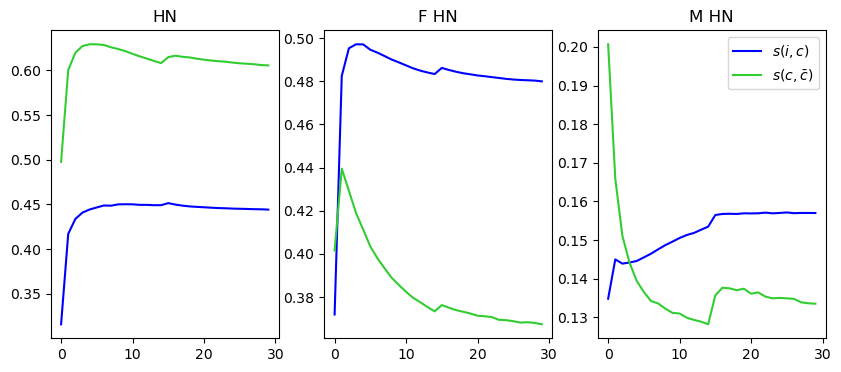

In [36]:
epochs= list(range(30))

elements_= F_HN_elements
(i_c_F_HN, i_n_c, i_c_n, i_n_i , c_n_c_F_HN, i_n_c_n)   = ([i[0][0] for i in elements_], [i[1][0] for i in elements_],[i[2][0] for i in elements_],[i[3][0] for i in elements_],[i[4][0] for i in elements_],[i[5][0] for i in elements_])

elements_= M_HN_elements
(i_c_M_HN, i_n_c, i_c_n, i_n_i , c_n_c_M_HN, i_n_c_n)   = ([i[0][0] for i in elements_], [i[1][0] for i in elements_],[i[2][0] for i in elements_],[i[3][0] for i in elements_],[i[4][0] for i in elements_],[i[5][0] for i in elements_])

elements_= HN_elements
(i_c_HN, i_n_c, i_c_n, i_n_i , c_n_c_HN, i_n_c_n)   = ([i[0][0] for i in elements_], [i[1][0] for i in elements_],[i[2][0] for i in elements_],[i[3][0] for i in elements_],[i[4][0] for i in elements_],[i[5][0] for i in elements_])


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
ax1.plot(epochs, i_c_HN,color="b" )
ax1.plot(epochs, c_n_c_HN, color="limegreen")
ax1.title.set_text('HN')
ax2.plot(epochs, i_c_F_HN, color="b")
ax2.plot(epochs, c_n_c_F_HN, color="limegreen")
ax2.title.set_text('F HN')
ax3.plot(epochs, i_c_M_HN, color="b", label= r'$s(i,c)$')
ax3.plot(epochs, c_n_c_M_HN,color="limegreen", label=r'$s(c, \bar{c})$')
ax3.title.set_text('M HN')
ax3.legend(loc="upper right")
plt.show()

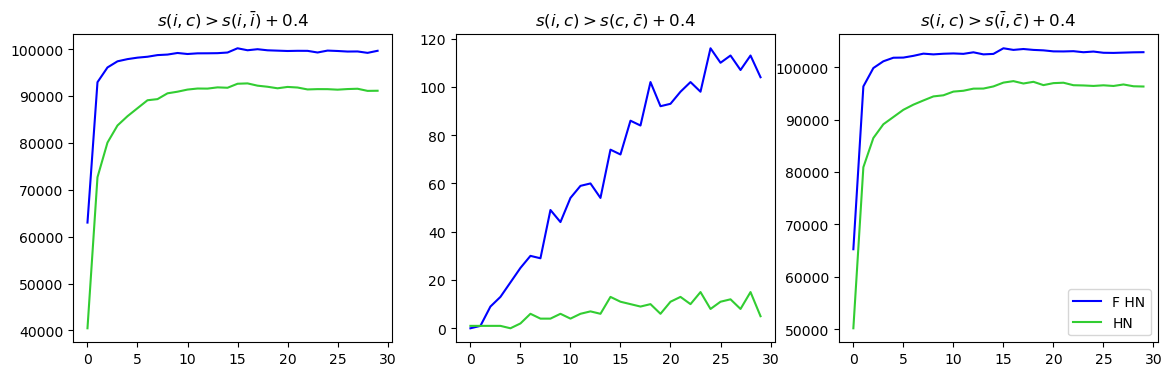

In [25]:
import matplotlib.pyplot as plt
epochs= list(range(30))

errores_= F_HN_errores
t2i=[i[0] for i in errores_]
i2t=[i[1] for i in errores_]
ps= [i[2] for i in errores_]

errores_= HN_errores
t2i_hn=[i[0] for i in errores_]
i2t_hn=[i[1] for i in errores_]
ps_hn= [i[2] for i in errores_]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
ax1.plot(epochs, t2i,color="b")
ax1.plot(epochs, t2i_hn, color="limegreen")
ax1.title.set_text(r'$s(i,c)>s(i, \bar{i})+ 0.4$')


ax2.plot(epochs, i2t, color="b")
ax2.plot(epochs, i2t_hn,color="limegreen")
ax2.title.set_text(r'$s(i,c)>s(c, \bar{c})+ 0.4$')

ax3.plot(epochs, ps, color="b",  label="F HN")
ax3.plot(epochs, ps_hn,color="limegreen",label="HN")
ax3.title.set_text(r'$s(i,c)>s( \bar{i}, \bar{c})+ 0.4$')
ax3.legend(loc="lower right")

plt.show()

COCO


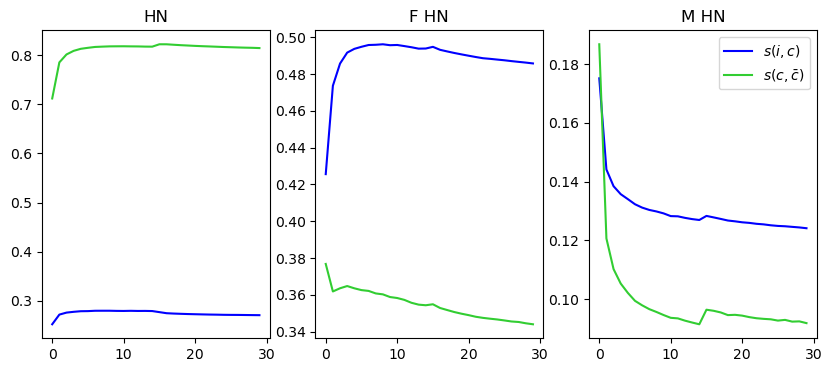

In [14]:
import matplotlib.pyplot as plt
epochs= list(range(30))

elements_= F_HN_elements
(i_c_F_HN, i_n_c, i_c_n, i_n_i , c_n_c_F_HN, i_n_c_n)   = ([i[0][0] for i in elements_], [i[1][0] for i in elements_],[i[2][0] for i in elements_],[i[3][0] for i in elements_],[i[4][0] for i in elements_],[i[5][0] for i in elements_])

elements_= M_HN_elements
(i_c_M_HN, i_n_c, i_c_n, i_n_i , c_n_c_M_HN, i_n_c_n)   = ([i[0][0] for i in elements_], [i[1][0] for i in elements_],[i[2][0] for i in elements_],[i[3][0] for i in elements_],[i[4][0] for i in elements_],[i[5][0] for i in elements_])

elements_= HN_elements
(i_c_HN, i_n_c, i_c_n, i_n_i , c_n_c_HN, i_n_c_n)   = ([i[0][0] for i in elements_], [i[1][0] for i in elements_],[i[2][0] for i in elements_],[i[3][0] for i in elements_],[i[4][0] for i in elements_],[i[5][0] for i in elements_])


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
ax1.plot(epochs, i_c_HN,color="b" )
ax1.plot(epochs, c_n_c_HN, color="limegreen")
ax1.title.set_text('HN')
ax2.plot(epochs, i_c_F_HN, color="b")
ax2.plot(epochs, c_n_c_F_HN, color="limegreen")
ax2.title.set_text('F HN')
ax3.plot(epochs, i_c_M_HN, color="b", label= r'$s(i,c)$')
ax3.plot(epochs, c_n_c_M_HN,color="limegreen", label=r'$s(c, \bar{c})$')
ax3.title.set_text('M HN')
ax3.legend(loc="upper right")
plt.show()

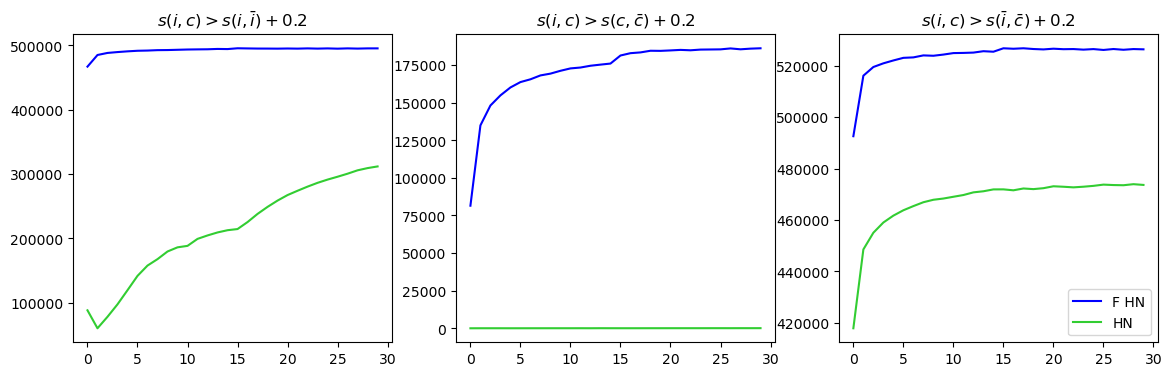

In [16]:
import matplotlib.pyplot as plt
epochs= list(range(30))

errores_= F_HN_errores
t2i=[i[0] for i in errores_]
i2t=[i[1] for i in errores_]
ps= [i[2] for i in errores_]

errores_= HN_errores
t2i_hn=[i[0] for i in errores_]
i2t_hn=[i[1] for i in errores_]
ps_hn= [i[2] for i in errores_]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
ax1.plot(epochs, t2i,color="b")
ax1.plot(epochs, t2i_hn, color="limegreen")
ax1.title.set_text(r'$s(i,c)>s(i, \bar{i})+ 0.2$')


ax2.plot(epochs, i2t, color="b")
ax2.plot(epochs, i2t_hn,color="limegreen")
ax2.title.set_text(r'$s(i,c)>s(c, \bar{c})+ 0.2$')

ax3.plot(epochs, ps, color="b",  label="F HN")
ax3.plot(epochs, ps_hn,color="limegreen",label="HN")
ax3.title.set_text(r'$s(i,c)>s( \bar{i}, \bar{c})+ 0.2$')
ax3.legend(loc="lower right")

plt.show()